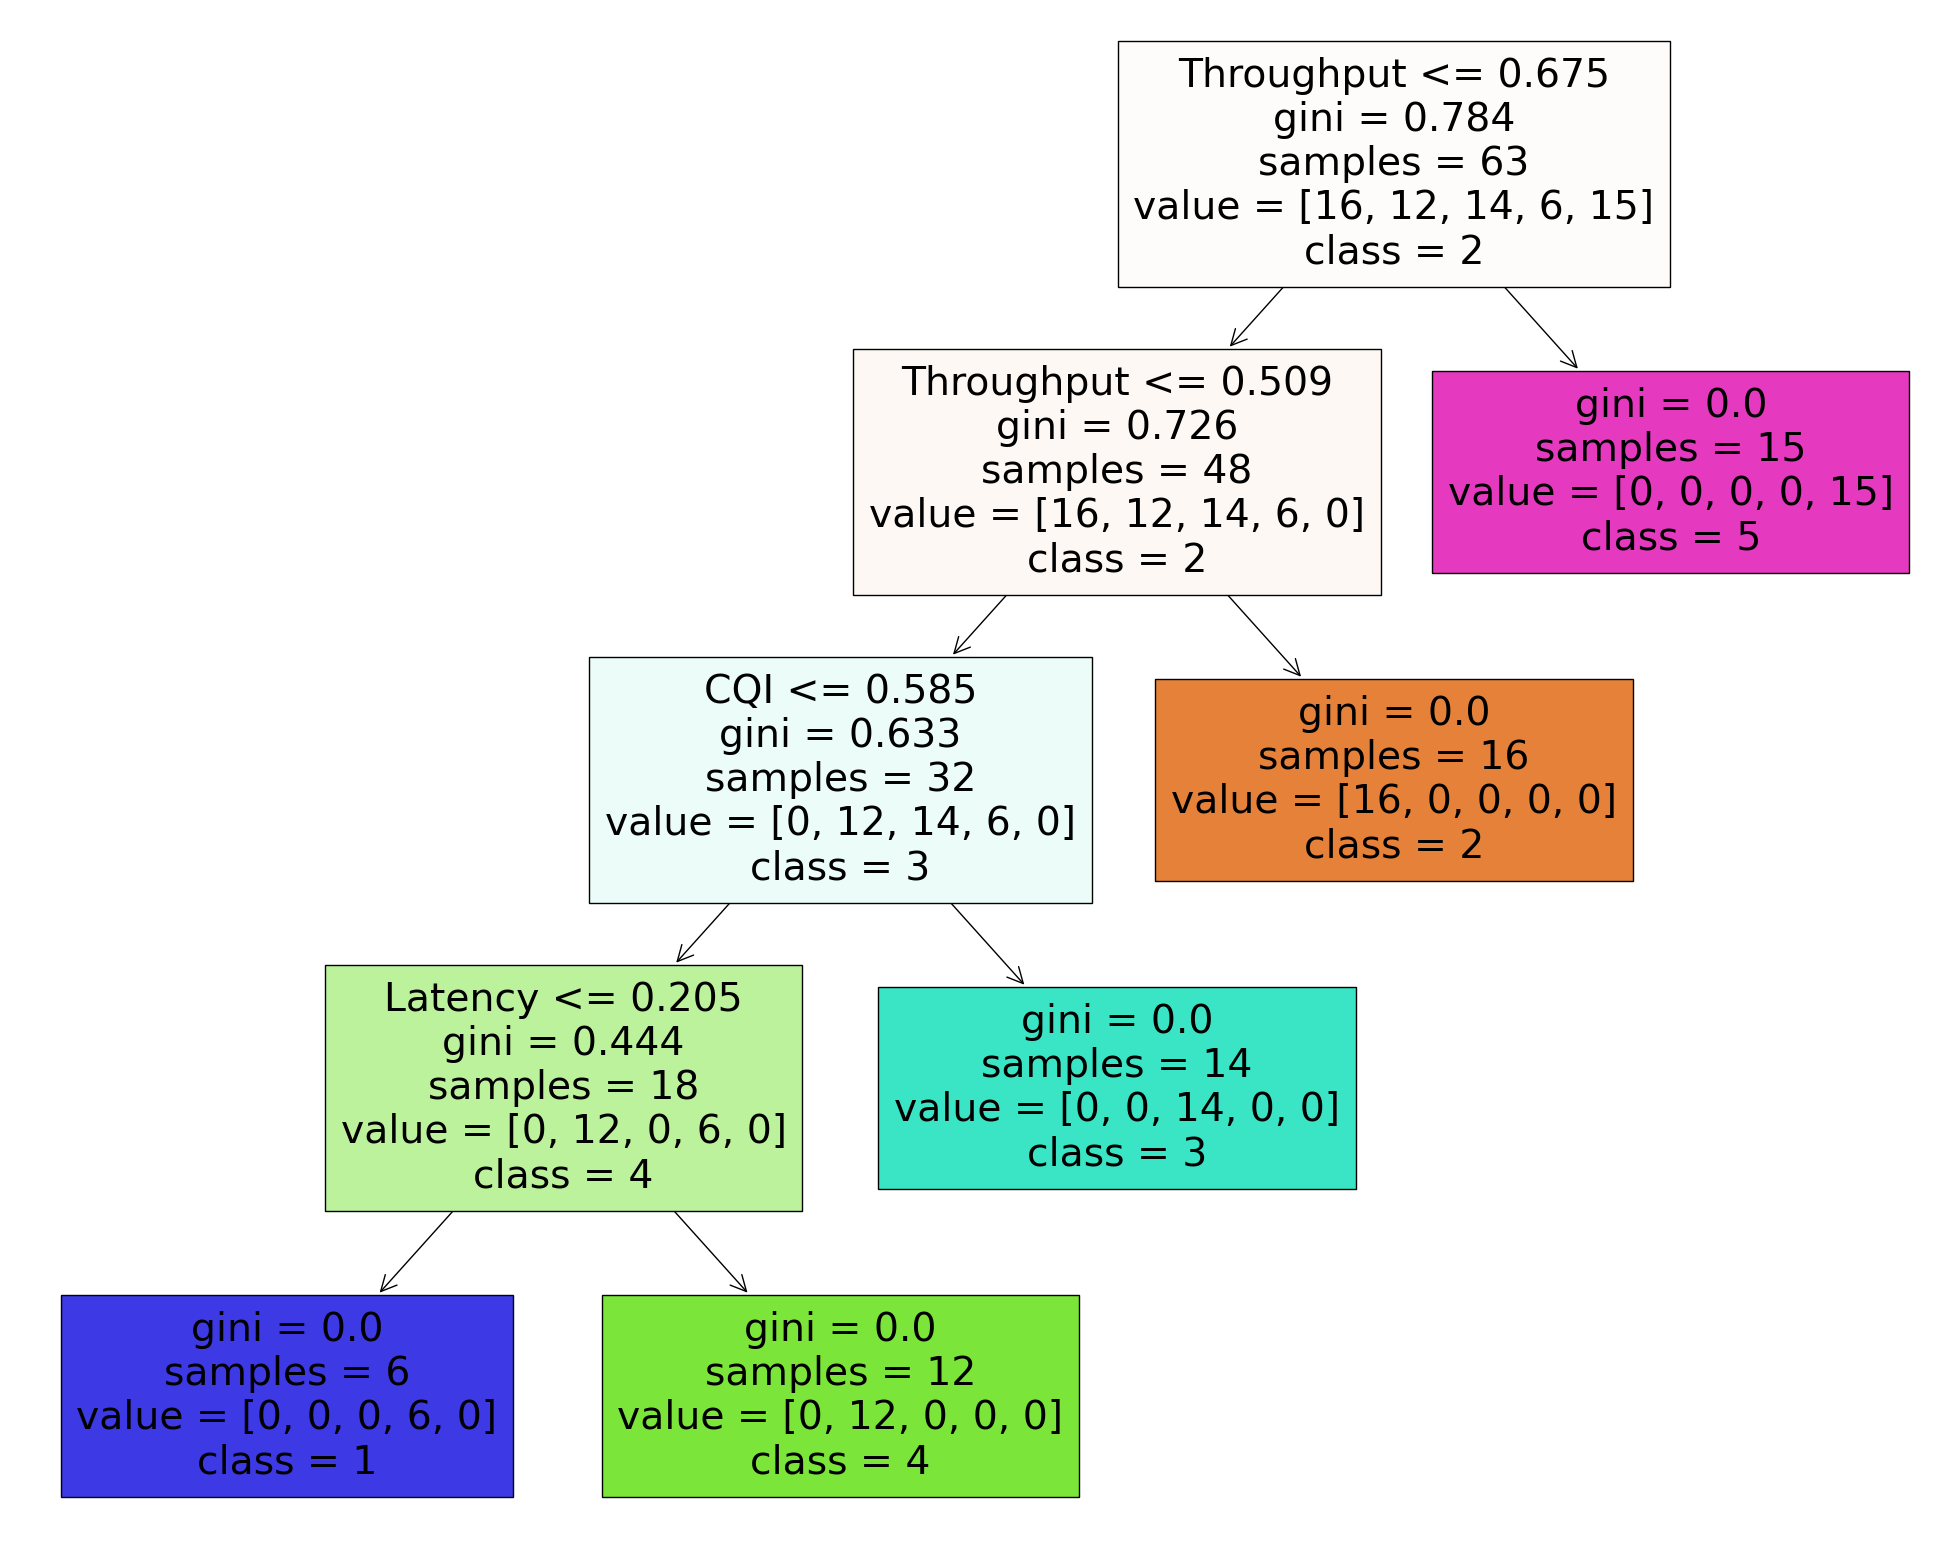

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz

# 加载数据
cluster = pd.read_excel('cluster_data.xlsx', sheet_name='Sheet2')

# 假设最后一列是目标变量，其余列是特征
X = cluster.iloc[:, :-1]  # 选择除了最后一列之外的所有列作为特征
y = cluster.iloc[:, -1]  # 选择最后一列作为目标变量

# 训练决策树模型
clf = DecisionTreeClassifier(random_state=123, max_depth=None)
clf.fit(X, y)

# 特征名和类别名需要自己指定
feature_names = X.columns
class_names = y.unique().astype(str)  # 将目标变量的唯一值转换为字符串格式，用作类别名

# 导出决策树图
export_graphviz(
    clf,
    out_file="cluster_tree.dot",  # 直接使用文件路径字符串
    feature_names=feature_names,  # 使用DataFrame的列名作为特征名
    class_names=class_names,
    rounded=True,
    filled=True
)

# 可视化决策树
plt.figure(figsize=(25,20))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

     UE    Data  Throughput    RRC    PRB    CQI  Connected mode  Latency  \
0   0.04  0.063       0.130  0.320  0.100  0.300           0.065    0.290   
1   0.14  0.160       0.200  0.076  0.170  0.510           0.140    0.120   
2   0.14  0.160       0.200  0.076  0.170  0.510           0.140    0.120   
3   0.21  0.300       0.498  0.090  0.199  0.660           0.220    0.100   
4   0.48  0.320       0.520  0.084  0.240  0.597           0.260    0.166   
..   ...    ...         ...    ...    ...    ...             ...      ...   
58  0.21  0.300       0.498  0.090  0.199  0.660           0.220    0.100   
59  0.48  0.320       0.520  0.084  0.240  0.597           0.260    0.166   
60  0.04  0.063       0.130  0.320  0.100  0.300           0.065    0.290   
61  0.48  0.320       0.520  0.084  0.240  0.597           0.260    0.166   
62  0.04  0.063       0.130  0.320  0.100  0.300           0.065    0.290   

    Hand over   Clusters  
0            0         2  
1            0       

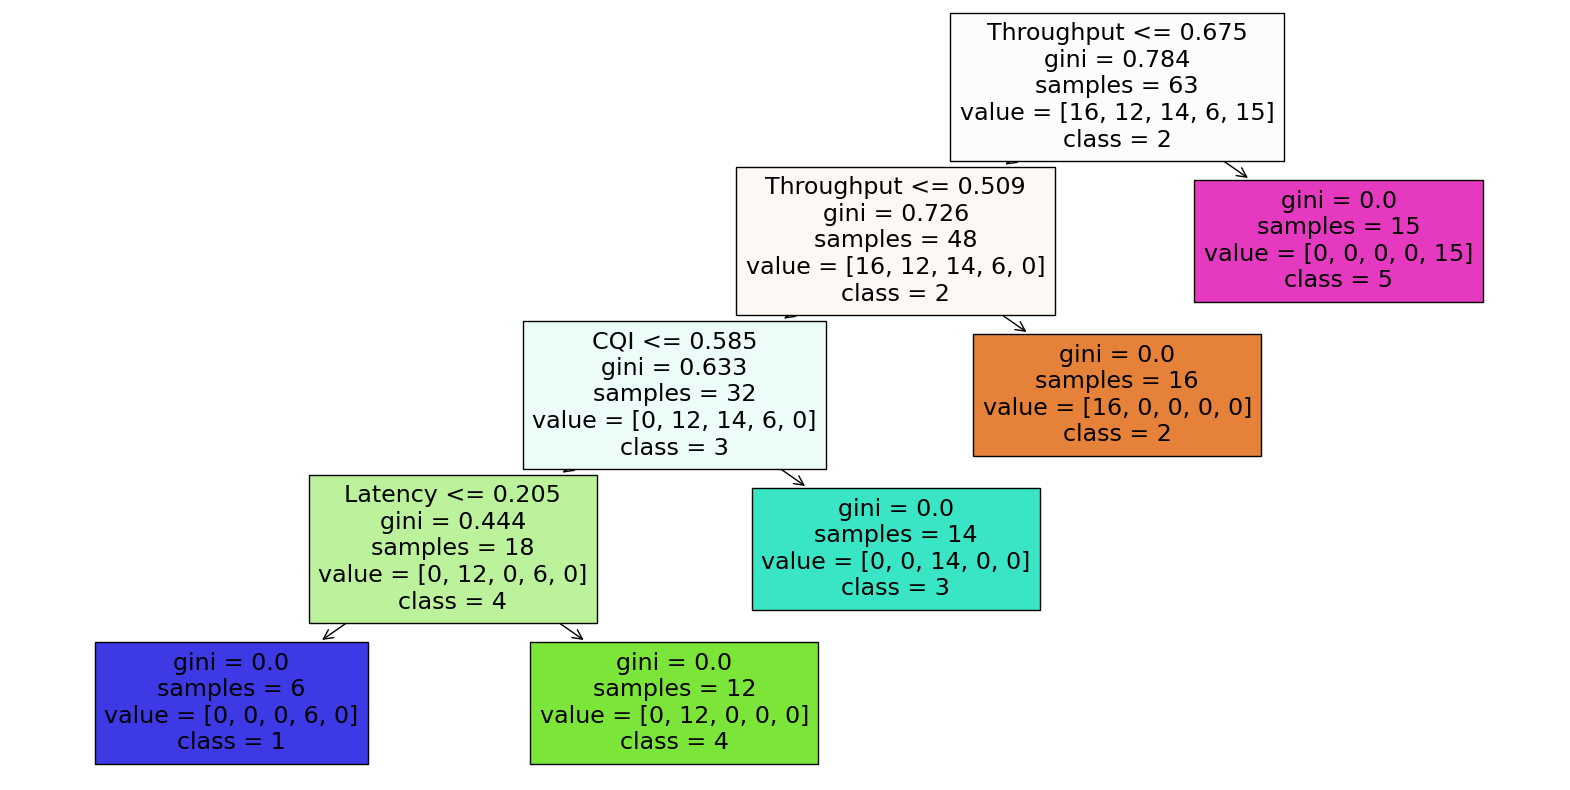

Accuracy: 1.0


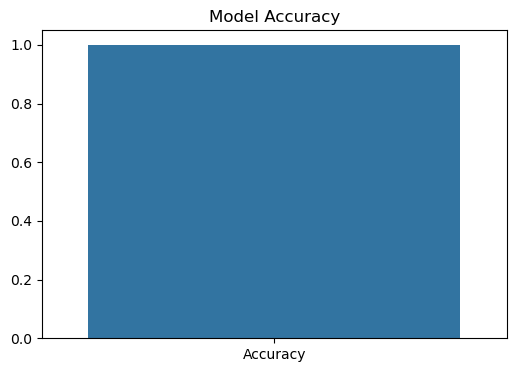

Confusion Matrix:
 [[4 0 0 0 0]
 [0 3 0 0 0]
 [0 0 4 0 0]
 [0 0 0 2 0]
 [0 0 0 0 6]]


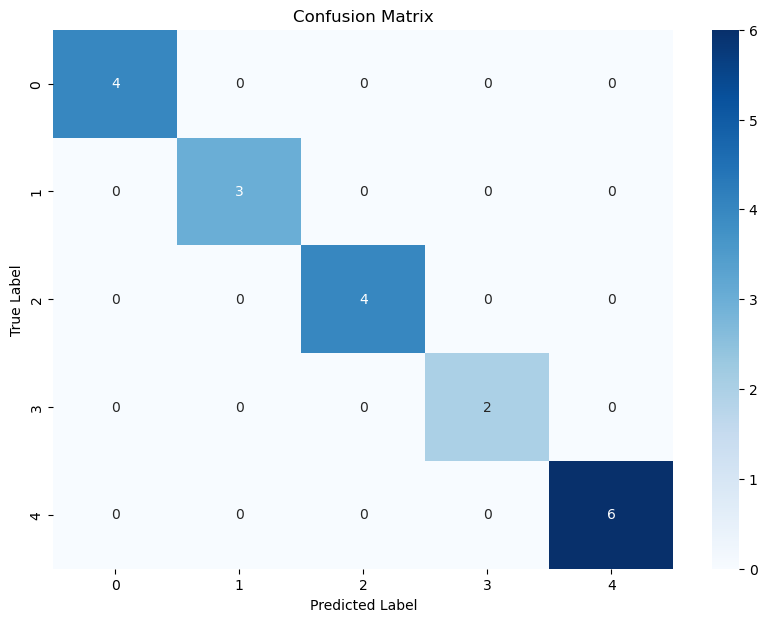


Classification Report:
 {'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19}}


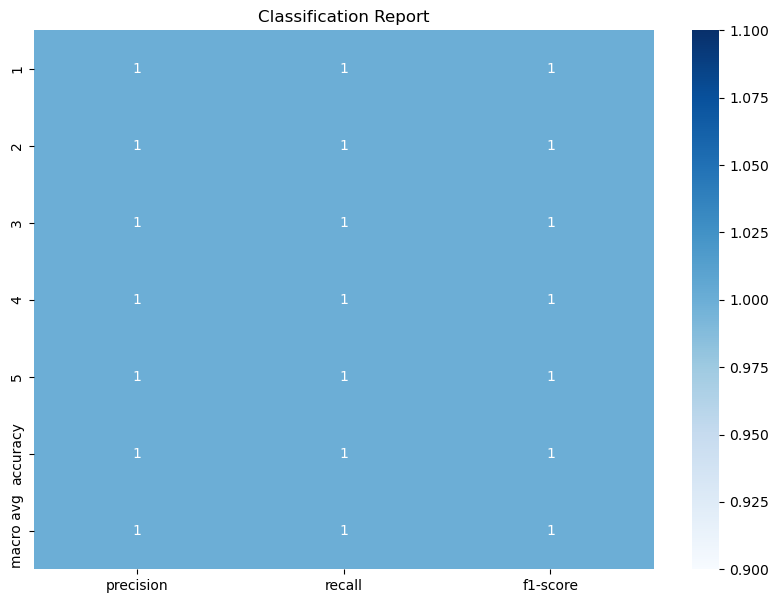

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 加载数据
cluster = pd.read_excel('cluster_data.xlsx', sheet_name='Sheet2')
print(cluster)

# Training  the decision tree model
clf = DecisionTreeClassifier(random_state=123, max_depth=None)
clf.fit(X, y)

# 假设最后一列是目标变量，其余列是特征
X = cluster.iloc[:, :-1]  # select the features
y = cluster.iloc[:, -1]  # last column is the target 

# 特征名和类别名需要自己指定
feature_names = X.columns
class_names = y.unique().astype(str)  # 将目标变量的唯一值转换为字符串格式，用作类别名

# exprot figure of DT
export_graphviz(
    clf,
    out_file="cluster_tree.dot",  # 直接使用文件路径字符串
    feature_names=feature_names,  # 使用DataFrame的列名作为特征名
    class_names=class_names,
    rounded=True,
    filled=True
)

# 可视化决策树
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()


# valitate the DT model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

clf = DecisionTreeClassifier(random_state=123,max_depth=None)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,output_dict=True)
# Accuracy visulization
print("Accuracy:", accuracy)
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Model Accuracy')
plt.show()

# 混淆矩阵可视化
print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 分类报告可视化
print("\nClassification Report:\n", class_report)
report_df = pd.DataFrame(class_report).transpose()
report_df = report_df.sort_values(by="f1-score", ascending=False)
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')  # 不包括最后一行总结数据
plt.title('Classification Report')
plt.show()





